In [52]:
import pandas as pd
import numpy as np
data = pd.read_csv('neo.csv')

In [4]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [15]:
data.shape

(90836, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [17]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [46]:
danger = data['hazardous'] == True
not_danger = data['hazardous'] == False


In [47]:
data[danger].describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,8.840000e+03,8840.000000,8840.000000,8840.000000,8.840000e+03,8840.000000
mean,6.535973e+06,0.294134,0.657704,62794.337025,3.994623e+07,20.307598
std,1.310974e+07,0.297099,0.664334,27175.110049,2.111883e+07,1.341676
min,2.001566e+06,0.088015,0.196807,5908.291826,1.432727e+05,14.040000
25%,2.380636e+06,0.142087,0.317717,43017.810183,2.172841e+07,19.607750
50%,3.102752e+06,0.201630,0.450858,58658.010358,4.098372e+07,20.600000
75%,3.703891e+06,0.318424,0.712018,78785.820511,5.852393e+07,21.360000
max,5.427275e+07,4.135757,9.247833,193386.975218,7.479095e+07,22.400000


In [49]:
data[not_danger].describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,8.199600e+04,81996.000000,81996.000000,81996.000000,8.199600e+04,81996.000000
mean,1.522885e+07,0.109460,0.244760,46479.153953,3.675609e+07,23.874199
std,2.137118e+07,0.293056,0.655293,24560.334742,2.245904e+07,2.801199
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.550572e+06,0.017561,0.039268,27636.010582,1.672851e+07,22.060000
50%,3.760438e+06,0.040230,0.089958,42565.504033,3.748745e+07,24.100000
75%,3.968757e+06,0.102933,0.230165,61062.400924,5.628455e+07,25.900000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [252]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [253]:
scaler = StandardScaler(with_std=False)
X = data.iloc[:,[2,3,4,5,8]].to_numpy()
scaler.fit(X)
X_scaled = normalize(scaler.transform(X),axis=0)
y = data['hazardous'].astype(int).to_numpy()


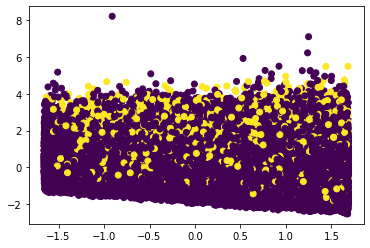

In [254]:
from sklearn.decomposition import FactorAnalysis

transformer1 = FactorAnalysis(n_components=2,random_state=0)
X_trans1 = transformer1.fit_transform(X)
plt.scatter(X_trans1[:,0],X_trans1[:,1],c=y)

In [255]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [256]:
transformer2 = PCA(n_components=3,random_state=0)

In [257]:
X_trans2 = transformer2.fit_transform(X_scaled)


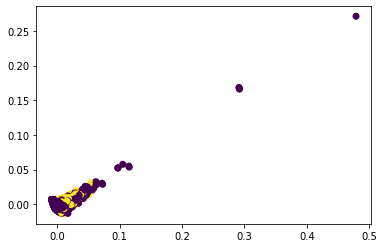

In [258]:
plt.scatter(X_trans2[:,0],X_trans2[:,1],c=y)

In [260]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2)
cl = cluster.fit_predict(X_scaled)

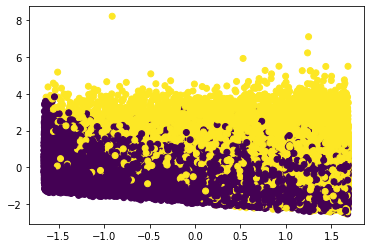

In [262]:
plt.scatter(X_trans1[:,0],X_trans1[:,1],c=cl)

array([[1.22494065e-02, 1.22494065e-02, 8.28901855e-04, 4.20373446e-03,
        2.34173277e-03],
       [2.71715897e-03, 2.71715897e-03, 4.49529897e-03, 4.70953273e-03,
        2.79944144e-03],
       [7.38099732e-03, 7.38099732e-03, 6.97969654e-03, 3.81731570e-03,
        2.49570205e-03],
       ...,
       [3.26674359e-04, 3.26674359e-04, 4.62231982e-04, 2.17705771e-03,
        3.44331297e-03],
       [7.48367723e-05, 7.48367720e-05, 4.22715410e-03, 5.26558224e-03,
        3.89122360e-03],
       [4.07488210e-04, 4.07488210e-04, 1.65083720e-03, 4.58182600e-03,
        3.37612638e-03]])